# Sentiment analysis on IMDb Movie Reviews

## Importing dataset from Kaggle

In [1]:
# from google.colab import files
# files.upload()

In [2]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

# !chmod 600 ~/.kaggle/kaggle.json

In [3]:
# !kaggle datasets download -d mwallerphunware/imbd-movie-reviews-for-binary-sentiment-analysis

In [4]:
# from zipfile import ZipFile
# file_name = "/content/imbd-movie-reviews-for-binary-sentiment-analysis.zip"

# with ZipFile(file_name,"r") as zip:
# 	zip.extractall()
# 	print("Done")

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

## Load the dataset

Dataset can be downloaded in https://www.kaggle.com/mwallerphunware/imbd-movie-reviews-for-binary-sentiment-analysis

In [6]:
df= pd.read_csv('/content/MovieReviewTrainingDatabase.csv')
print('Dataset shape:',df.shape)

Dataset shape: (25000, 2)


In [7]:
df.head()

,sentiment,review
0,Positive,With all this stuff going down at the moment w...
1,Positive,'The Classic War of the Worlds' by Timothy Hin...
2,Negative,The film starts with a manager (Nicholas Bell)...
3,Negative,It must be assumed that those who praised this...
4,Positive,Superbly trashy and wondrously unpretentious 8...


### Sample positive movie review

In [8]:
print('Sentiment:',df.iloc[0]['sentiment'])
print('Review:')
print(df.iloc[0]['review'])

Sentiment: Positive
Review:
With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.  Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.  The actual feature film bit when it fina

### Sample negative movie review

In [9]:
print('Sentiment:',df.iloc[2]['sentiment'])
print('Review:')
print(df.iloc[2]['review'])

Sentiment: Negative
Review:
The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carradine) to Primal Park . A secret project mutating a primal animal using fossilized DNA, like'Jurassik Park', and some scientists resurrect one of nature's most fearsome predators, the Sabretooth tiger or Smilodon . Scientific ambition turns deadly, however, and when the high voltage fence is opened the creature escape and begins savagely stalking its prey - the human visitors , tourists and scientific.Meanwhile some youngsters enter in the restricted area of the security center and are attacked by a pack of large pre-historical animals which are deadlier and bigger . In addition , a security agent (Stacy Haiduk) and her mate (Brian Wimmer) fight hardly against the carnivorous Smilodons. The Sabretooths, themselves , of course, are the real star stars and they are astounding terrifyingly though not convincing. The giant animals savagely are stalking its prey and the group run 

### Checking for null values

In [10]:
df.isna().sum()

sentiment    0
review       0
dtype: int64

### Dropping duplicates

In [11]:
duplicates = df['review'].duplicated().sum()
print(f'Number of duplicates: {duplicates}')

df = df.drop_duplicates(subset=['review'])

Number of duplicates: 96


In [12]:
df.shape

(24904, 2)

## Data Visualization

* Sentiment distribution
* Review length

### Sentiment distribution

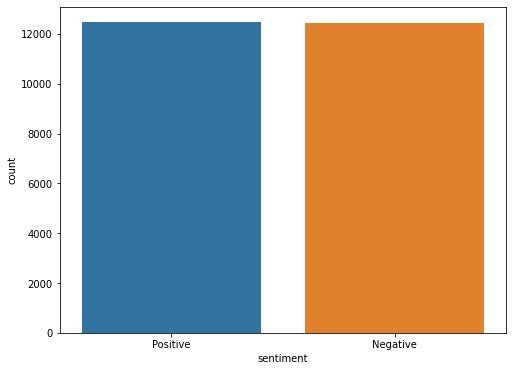

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(df['sentiment'])
plt.show()

### Review length

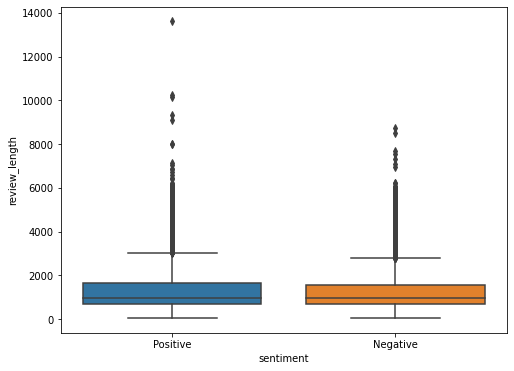

In [14]:
review_length = [len(review) for review in df['review']]
df['review_length'] = review_length

plt.figure(figsize=(8,6))
sns.boxplot(x='sentiment',y='review_length',data=df)
plt.show()

In [15]:
# dropping too long reviews to speed up the process
df2 = df[df['review_length']<3000]
df2.shape

(23174, 3)

## Data Preprocessing

* Remove special characters and digits
* Convert sentences into lower case
* Tokenize by words / split by words
* Remove stopwords and lemmetize words
* Build corpus
* One hot representation of corpus
* Add pre-padding


In [16]:
# Importing essential libraries for data preprocessing and nlp
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
corpus = []
lemmatizer = WordNetLemmatizer()

for review in df2['review']:   
    # Remove special characters and digits
    removed_spchar_digits = re.sub('[^a-zA-Z]',' ',review)
    
    # Convert sentences into lower case
    lower_case = removed_spchar_digits.lower()
    
    # Tokenize by words / split by words
    tokenized_sentence = lower_case.split()
    
    # Remove stopwords and lemmetize word
    lemmetized_words = [lemmatizer.lemmatize(word) for word in tokenized_sentence if word not in stopwords.words('english')]
    
    # Build corpus
    review = ' '.join(lemmetized_words)
    corpus.append(review)

In [18]:
corpus[:3]

['stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighty maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle message mj feeling towards press also obvious message drug bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fan would say made fan true really nice actual feature film bit finally start minute excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord want mj dead bad beyond mj overheard plan nah joe pesci character ranted wanted people know supplying drug etc dunno maybe hate mj music lot cool thing like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually director hate working one kid let 

In [19]:
# One hot representation of corpus
# Consist of indices of words from vocabulary/dictionary

vocabulary_size = 10000
one_hot_representation = [one_hot(review,vocabulary_size) for review in corpus]
np.array(one_hot_representation[0])

array([4224, 3394, 9891, 6196, 7968,   10,  359, 7374, 6084, 4044, 1920,
        111, 1920, 8855,  443, 5397,  281, 2497, 6769, 9040, 8792, 6486,
        943, 5233,  443, 9884, 1168,  948, 8661, 9980, 8855, 8242, 1343,
       8242, 5346, 6682, 1355, 3394, 2817, 8374,  789, 6587, 4190,  301,
       6196, 9453,  794, 6546, 7172,  208,  301, 5755, 2370,  511,  155,
       1817, 8207, 1989, 6621, 9884, 8603, 4093, 6196, 4194, 3394, 7289,
       5076, 4996, 2274, 5792, 6196, 9956, 6893, 8920, 1733, 6196, 1870,
       1262, 7271, 9954, 1870, 5721, 6486, 5381, 4117, 5346, 6682, 5272,
       2913, 6798, 6453, 4844, 4424, 9550, 7972, 9541, 9451, 2780, 4074,
       6922, 5755, 8649, 5397, 6196, 1508, 2370, 9478, 6196, 1491, 1666,
       3636, 9541, 9451, 2023, 3539, 9157, 9114, 3957, 4796, 5755, 3589,
        840,  443, 7289, 6196,  359, 2850,  943, 9731, 4093, 6196, 6516,
       7351, 3486, 5745, 6394, 3245, 7972, 7172, 6048, 3248, 8826, 3132,
       4007, 2443, 4094, 2370, 7972, 4659, 6048, 72

In [20]:
lengths = [len(i) for i in one_hot_representation]
print(f'Maximum length in one hot list: {max(lengths)}')

# Add pre-padding 
# Adds additional zeroes to have lengths of all one hot representations equal

sentence_length = 310
padded_onehot = pad_sequences(one_hot_representation,maxlen=sentence_length)
padded_onehot[0]

Maximum length in one hot list: 307


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 4224, 3394, 9891, 6196, 7968,   10,  359, 7374,
       6084, 4044, 1920,  111, 1920, 8855,  443, 5397,  281, 2497, 6769,
       9040, 8792, 6486,  943, 5233,  443, 9884, 1168,  948, 8661, 9980,
       8855, 8242, 1343, 8242, 5346, 6682, 1355, 3394, 2817, 8374,  789,
       6587, 4190,  301, 6196, 9453,  794, 6546, 7172,  208,  301, 5755,
       2370,  511,  155, 1817, 8207, 1989, 6621, 98

## Model Building

* Splitting the dataset into training and testing data
* Model training
* Model evaluation
* Saving the model

In [21]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Splitting the dataset into training and testing data

In [22]:
X = padded_onehot
y = np.array(df2['sentiment'].replace({'Positive':1,'Negative':0}))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)
print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')

X train shape: (16221, 310)
X test shape: (6953, 310)


### Model training

In [23]:
# dimension of feature vector
embedding_vector_features = 45

model = Sequential()

# Embedding layer converts word into feature vectors
model.add(Embedding(vocabulary_size, embedding_vector_features, input_length=sentence_length))

# Bidirectional LSTM RNN
model.add(Bidirectional(LSTM(100,dropout=0.5)))

# Classification layer
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train,y_train,validation_split=0.2,batch_size=128,epochs=5)

Epoch 1/5
102/102 [==============================] - 19s 147ms/step - loss: 0.6702 - accuracy: 0.5864 - val_loss: 0.3807 - val_accuracy: 0.8413
Epoch 2/5
102/102 [==============================] - 14s 136ms/step - loss: 0.3207 - accuracy: 0.8696 - val_loss: 0.3267 - val_accuracy: 0.8592
Epoch 3/5
102/102 [==============================] - 14s 135ms/step - loss: 0.2069 - accuracy: 0.9246 - val_loss: 0.3675 - val_accuracy: 0.8616
Epoch 4/5
102/102 [==============================] - 14s 136ms/step - loss: 0.1633 - accuracy: 0.9408 - val_loss: 0.3963 - val_accuracy: 0.8564
Epoch 5/5
102/102 [==============================] - 14s 135ms/step - loss: 0.1195 - accuracy: 0.9599 - val_loss: 0.4329 - val_accuracy: 0.8487


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 310, 45)           450000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               116800    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 567,001
Trainable params: 567,001
Non-trainable params: 0
_________________________________________________________________


### Model evaluation

In [25]:
# Evaluate our model in test data
model.evaluate(X_test,y_test)

218/218 [==============================] - 8s 37ms/step - loss: 0.4081 - accuracy: 0.8542


[0.40807387232780457, 0.854163646697998]

In [26]:
y_predicted = [1 if y >= 0.5 else 0 for y in model.predict(X_test).flatten()]
y_predicted[:5]

[1, 0, 0, 0, 0]

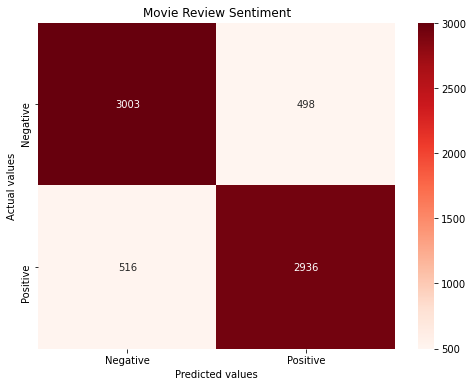

In [27]:
confusion_matrix_result = confusion_matrix(y_test,y_predicted)

labels = ['Negative','Positive']
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Reds',fmt='.0f',xticklabels=labels,yticklabels=labels)
plt.title('Movie Review Sentiment')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [28]:
classification_report_result = classification_report(y_test,y_predicted)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      3501
           1       0.85      0.85      0.85      3452

    accuracy                           0.85      6953
   macro avg       0.85      0.85      0.85      6953
weighted avg       0.85      0.85      0.85      6953



### Saving the model

In [29]:
model.save('movie_sentiment_analysis_model.h5')